In [21]:
import numpy as np
import pandas as pd

#visualisations
import seaborn as sns
import matplotlib.pyplot as plt
import logging
# data preprocessing
from sklearn.preprocessing import LabelEncoder

# ignnore warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [48]:
df = pd.read_csv('Breast Cancer.csv')

In [50]:
#Exploratory Data Analysis

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
# Get column names
col = dataset.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [52]:
def count_plot(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df, x=column,palette=["blue", "skyblue"])
    plt.xlabel(f'{column}', fontsize=17)
    plt.ylabel("Count", fontsize=17)
    plt.title(f'\nDistribution of {column}\n', size=18, fontweight='bold')
    plt.show()

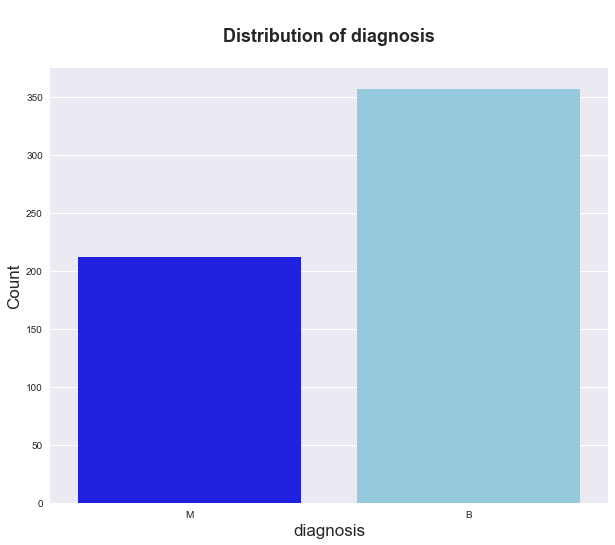

In [53]:

count_plot(df, "diagnosis")

<AxesSubplot:>

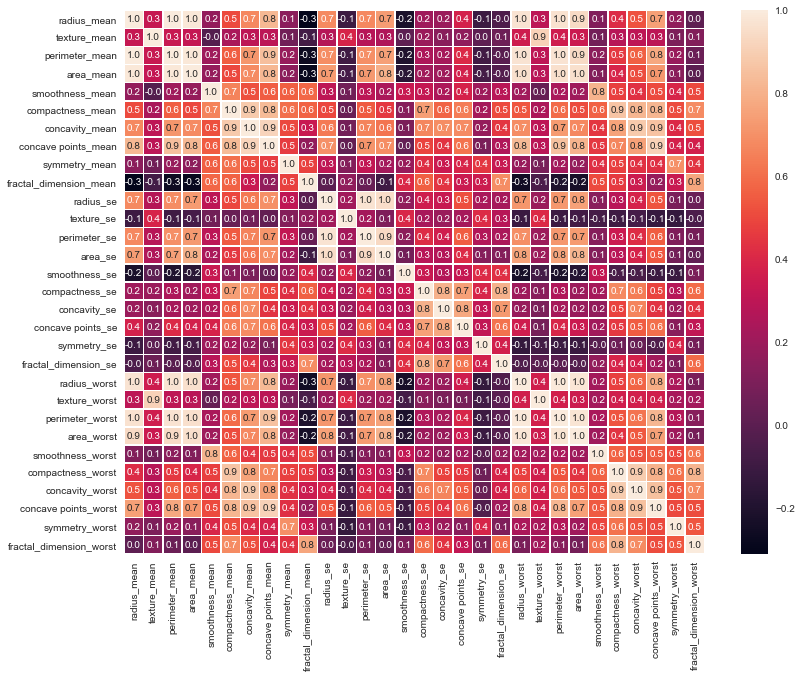

In [46]:
#correlation map
f,ax = plt.subplots(figsize=(13, 10))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [35]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','smoothness_mean',
              'perimeter_se','symmetry_mean','symmetry_se','concave points_worst','compactness_se',
              'concave points_se','texture_worst','area_worst','fractal_dimension_mean',
              'texture_se','smoothness_se','concavity_se','concavity_worst','fractal_dimension_worst']

x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,concavity_mean,radius_se,area_se,fractal_dimension_se,radius_worst,perimeter_worst,smoothness_worst,compactness_worst,symmetry_worst
0,10.38,1001.0,0.3001,1.0950,153.40,0.006193,25.38,184.60,0.1622,0.6656,0.4601
1,17.77,1326.0,0.0869,0.5435,74.08,0.003532,24.99,158.80,0.1238,0.1866,0.2750
2,21.25,1203.0,0.1974,0.7456,94.03,0.004571,23.57,152.50,0.1444,0.4245,0.3613
3,20.38,386.1,0.2414,0.4956,27.23,0.009208,14.91,98.87,0.2098,0.8663,0.6638
4,14.34,1297.0,0.1980,0.7572,94.44,0.005115,22.54,152.20,0.1374,0.2050,0.2364


In [30]:
# Get column names
col = dataset.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


<AxesSubplot:>

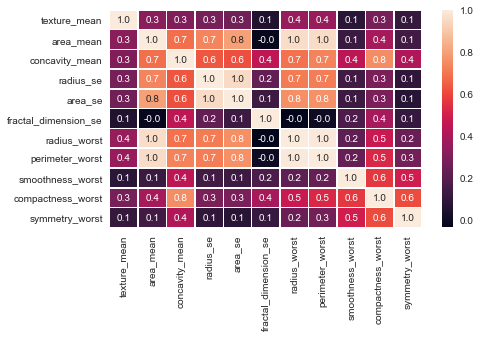

In [43]:
#correlation map
f,ax = plt.subplots(figsize=(7, 4))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<ipython-input-71-57000a5be883>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)


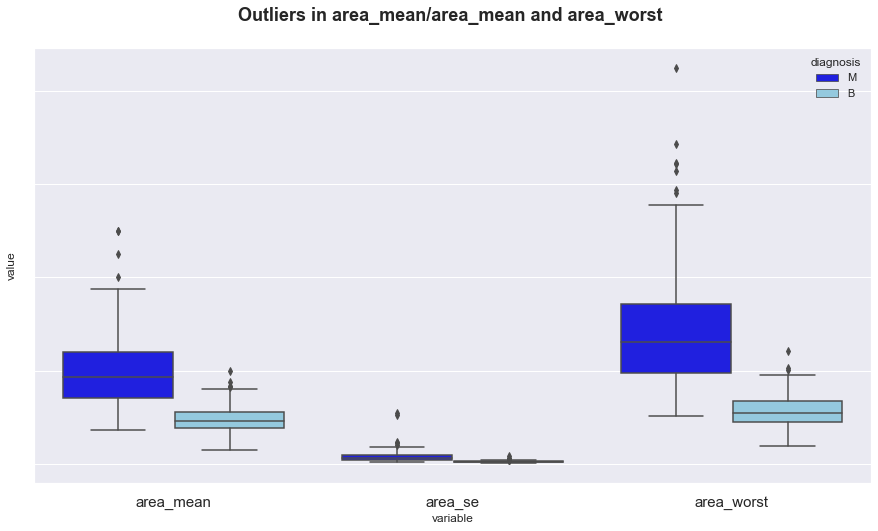

In [71]:
sns.set(style="darkgrid")
melted_data = pd.melt(df, id_vars='diagnosis', value_vars=['area_mean', 'area_se', 'area_worst'])
plt.figure(figsize=(15, 8))
res=sns.boxplot(x='variable', y='value', hue='diagnosis', data=melted_data,palette=["blue", "skyblue"])
plt.title('Outliers in area_mean/area_mean and area_worst \n', size=18, fontweight='bold')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
plt.show()

In [57]:


df.pop('Unnamed: 32')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [59]:
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler

In [60]:
new_df = df.copy()
new_df= new_df.drop(['id'],axis=1)
new_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
X = new_df.drop(["diagnosis"], axis=1)
y = new_df["diagnosis"]

In [63]:
# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
# spliting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=42
)

In [65]:

# create the classifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
classifier = RandomForestClassifier(n_estimators=100)

In [66]:
# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
# predicting on the test set
y_pred = classifier.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
rf_cnm=confusion_matrix(y_test, y_pred)
print ('Accuracy Score :',accuracy_score(y_test, y_pred))

Accuracy Score : 0.9736842105263158


Text(0.5, 1.0, 'Feature importance')

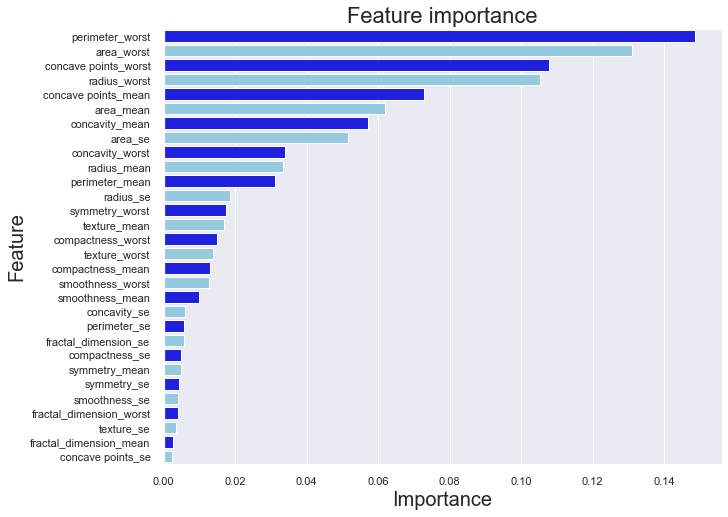

In [69]:
# get importance
importances = classifier.feature_importances_
labels = X.columns
feature_df = pd.DataFrame(list(zip(labels, importances)), columns=["feature", "importance"])
feature_df = feature_df.sort_values(by='importance', ascending=False, )
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="importance", y="feature", data=feature_df,palette=["blue", "skyblue"])
ax.set_xlabel('Importance', fontsize=20)
ax.set_ylabel('Feature', fontsize=20)  # ylabel
ax.set_title('Feature importance', fontsize=22)